In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("../data/dataset.csv")

In [3]:
# check if there is na/all-0 col in dataframe
data.isna().values.any()

False

In [4]:
(data==0).any(axis=0)

Benchmark                   False
Input Size                  False
Threads                     False
cycles                      False
instructions                False
ins_per_cycle               False
cache_references            False
cache_misses                False
cache_misses_percent        False
branches_instructions       False
branch_misses               False
bus_cycles                  False
ref_cycles                  False
alignment_faults             True
bpf_output                   True
cpu_clock                   False
cpu_migrations               True
dummy                        True
emulation_faults             True
major_faults                 True
minor_faults                False
page_faults                 False
LLC_loads                   False
LLC_load_misses             False
LLC_misses_percent          False
LLC_stores                  False
LLC_store_misses            False
LLC_store_misses_percent    False
time                        False
user_time     

In [5]:
data = data.loc[:,(data!=0).any(axis=0)]

In [6]:
data.head(5)

,Benchmark,Input Size,Threads,cycles,instructions,ins_per_cycle,cache_references,cache_misses,cache_misses_percent,branches_instructions,...,page_faults,LLC_loads,LLC_load_misses,LLC_misses_percent,LLC_stores,LLC_store_misses,LLC_store_misses_percent,time,user_time,sys_time
0,blackscholes,simsmall,1,521324755,668243892,1.28,13221057,137813,1.042,174052847,...,69534,3586395,67890,1.892987,2044892,33142,1.620721,0.045,0.045,0.0
1,blackscholes,simsmall,2,604087463,745514225,1.23,13201504,205125,1.554,179328504,...,69530,3756986,83124,2.212518,1932305,46893,2.426791,0.028,0.045,0.0
2,blackscholes,simsmall,3,540727036,676803235,1.25,14204116,184545,1.299,177831187,...,69493,3291078,25693,0.780686,2158862,14048,0.650713,0.023,0.045,0.0
3,blackscholes,simsmall,4,568738331,689568815,1.21,13690247,205561,1.502,155514994,...,70120,3594115,79537,2.212979,1976488,22368,1.131704,0.021,0.046,0.0
4,blackscholes,simsmall,5,506534749,642433245,1.27,12650468,87662,0.693,149658203,...,69519,3211251,54678,1.702701,2390876,9848,0.411899,0.018,0.045,0.0


In [7]:
data.shape

(12000, 27)

In [8]:
data.columns

Index(['Benchmark', 'Input Size', 'Threads', 'cycles', 'instructions',
       'ins_per_cycle', 'cache_references', 'cache_misses',
       'cache_misses_percent', 'branches_instructions', 'branch_misses',
       'bus_cycles', 'ref_cycles', 'cpu_clock', 'cpu_migrations',
       'major_faults', 'minor_faults', 'page_faults', 'LLC_loads',
       'LLC_load_misses', 'LLC_misses_percent', 'LLC_stores',
       'LLC_store_misses', 'LLC_store_misses_percent', 'time', 'user_time',
       'sys_time'],
      dtype='object')

In [9]:
data.head(5)

,Benchmark,Input Size,Threads,cycles,instructions,ins_per_cycle,cache_references,cache_misses,cache_misses_percent,branches_instructions,...,page_faults,LLC_loads,LLC_load_misses,LLC_misses_percent,LLC_stores,LLC_store_misses,LLC_store_misses_percent,time,user_time,sys_time
0,blackscholes,simsmall,1,521324755,668243892,1.28,13221057,137813,1.042,174052847,...,69534,3586395,67890,1.892987,2044892,33142,1.620721,0.045,0.045,0.0
1,blackscholes,simsmall,2,604087463,745514225,1.23,13201504,205125,1.554,179328504,...,69530,3756986,83124,2.212518,1932305,46893,2.426791,0.028,0.045,0.0
2,blackscholes,simsmall,3,540727036,676803235,1.25,14204116,184545,1.299,177831187,...,69493,3291078,25693,0.780686,2158862,14048,0.650713,0.023,0.045,0.0
3,blackscholes,simsmall,4,568738331,689568815,1.21,13690247,205561,1.502,155514994,...,70120,3594115,79537,2.212979,1976488,22368,1.131704,0.021,0.046,0.0
4,blackscholes,simsmall,5,506534749,642433245,1.27,12650468,87662,0.693,149658203,...,69519,3211251,54678,1.702701,2390876,9848,0.411899,0.018,0.045,0.0


In [10]:
data.dtypes

Benchmark                    object
Input Size                   object
Threads                       int64
cycles                        int64
instructions                  int64
ins_per_cycle               float64
cache_references              int64
cache_misses                  int64
cache_misses_percent        float64
branches_instructions         int64
branch_misses                 int64
bus_cycles                    int64
ref_cycles                    int64
cpu_clock                   float64
cpu_migrations                int64
major_faults                  int64
minor_faults                  int64
page_faults                   int64
LLC_loads                     int64
LLC_load_misses               int64
LLC_misses_percent          float64
LLC_stores                    int64
LLC_store_misses              int64
LLC_store_misses_percent    float64
time                        float64
user_time                   float64
sys_time                    float64
dtype: object

In [11]:
data.describe()

,Threads,cycles,instructions,ins_per_cycle,cache_references,cache_misses,cache_misses_percent,branches_instructions,branch_misses,bus_cycles,...,page_faults,LLC_loads,LLC_load_misses,LLC_misses_percent,LLC_stores,LLC_store_misses,LLC_store_misses_percent,time,user_time,sys_time
count,12000.000000,1.200000e+04,1.200000e+04,12000.000000,1.200000e+04,1.200000e+04,12000.000000,1.200000e+04,1.200000e+04,1.200000e+04,...,1.200000e+04,1.200000e+04,1.200000e+04,12000.000000,1.200000e+04,1.200000e+04,12000.000000,12000.000000,12000.000000,12000.000000
mean,8.500000,5.727307e+09,9.859915e+09,1.595872,1.685333e+08,7.030203e+06,5.201414,1.368561e+09,2.114916e+07,2.720756e+08,...,9.685573e+04,3.171914e+07,1.704509e+06,5.813969,9.158729e+06,9.672202e+05,4.728276,0.719336,2.303442,0.170095
std,4.609964,8.256475e+09,1.548821e+10,0.502680,6.255121e+08,3.060518e+07,7.131502,1.960565e+09,3.865963e+07,3.777738e+08,...,1.017851e+05,1.003471e+08,5.048689e+06,8.061491,2.001272e+07,4.042147e+06,8.129125,1.461229,3.531612,0.588309
min,1.000000,4.430309e+08,5.479203e+08,0.510000,8.368830e+06,5.386500e+04,0.003000,1.309339e+08,2.909465e+06,2.450477e+07,...,6.807300e+04,2.398443e+06,1.475900e+04,0.007333,1.027391e+06,5.084000e+03,0.092580,0.002000,0.000000,0.000000
25%,4.750000,6.945940e+08,9.558909e+08,1.230000,1.522629e+07,1.940625e+05,0.982000,2.089169e+08,4.104572e+06,4.082375e+07,...,6.973500e+04,4.003034e+06,5.404850e+04,0.950551,2.317424e+06,2.257475e+04,0.795311,0.098000,0.062000,0.002000
50%,8.500000,1.837113e+09,3.107422e+09,1.430000,2.427978e+07,5.894810e+05,2.029000,4.926237e+08,6.942319e+06,9.621546e+07,...,7.161750e+04,6.287350e+06,1.855800e+05,2.332171,3.835776e+06,5.718850e+04,1.412680,0.190500,0.646000,0.025000
75%,12.250000,7.049128e+09,1.162632e+10,1.860000,5.933671e+07,2.657690e+06,7.190000,1.583072e+09,1.711841e+07,3.329123e+08,...,8.398600e+04,1.744948e+07,7.826198e+05,7.109470,6.898424e+06,2.651640e+05,3.847585,0.595000,3.002250,0.093000
max,16.000000,4.399288e+10,9.605588e+10,3.490000,5.175426e+09,4.047564e+08,53.439000,1.028992e+10,2.703555e+08,2.026865e+09,...,1.192374e+06,1.095928e+09,5.533783e+07,60.684001,3.441865e+08,6.094097e+07,78.495231,15.408000,20.082000,7.065000


In [12]:
benchmark = data['Benchmark'].unique()
input_size = data['Input Size'].unique()

for i in range(len(benchmark)):
    data.replace({benchmark[i]:i},inplace=True)

for i in range(len(input_size)):
    data.replace({input_size[i]:i},inplace=True)

In [13]:
data.dtypes

Benchmark                     int64
Input Size                    int64
Threads                       int64
cycles                        int64
instructions                  int64
ins_per_cycle               float64
cache_references              int64
cache_misses                  int64
cache_misses_percent        float64
branches_instructions         int64
branch_misses                 int64
bus_cycles                    int64
ref_cycles                    int64
cpu_clock                   float64
cpu_migrations                int64
major_faults                  int64
minor_faults                  int64
page_faults                   int64
LLC_loads                     int64
LLC_load_misses               int64
LLC_misses_percent          float64
LLC_stores                    int64
LLC_store_misses              int64
LLC_store_misses_percent    float64
time                        float64
user_time                   float64
sys_time                    float64
dtype: object

In [14]:
data.head(5)

,Benchmark,Input Size,Threads,cycles,instructions,ins_per_cycle,cache_references,cache_misses,cache_misses_percent,branches_instructions,...,page_faults,LLC_loads,LLC_load_misses,LLC_misses_percent,LLC_stores,LLC_store_misses,LLC_store_misses_percent,time,user_time,sys_time
0,0,0,1,521324755,668243892,1.28,13221057,137813,1.042,174052847,...,69534,3586395,67890,1.892987,2044892,33142,1.620721,0.045,0.045,0.0
1,0,0,2,604087463,745514225,1.23,13201504,205125,1.554,179328504,...,69530,3756986,83124,2.212518,1932305,46893,2.426791,0.028,0.045,0.0
2,0,0,3,540727036,676803235,1.25,14204116,184545,1.299,177831187,...,69493,3291078,25693,0.780686,2158862,14048,0.650713,0.023,0.045,0.0
3,0,0,4,568738331,689568815,1.21,13690247,205561,1.502,155514994,...,70120,3594115,79537,2.212979,1976488,22368,1.131704,0.021,0.046,0.0
4,0,0,5,506534749,642433245,1.27,12650468,87662,0.693,149658203,...,69519,3211251,54678,1.702701,2390876,9848,0.411899,0.018,0.045,0.0


In [15]:
data.describe()

,Benchmark,Input Size,Threads,cycles,instructions,ins_per_cycle,cache_references,cache_misses,cache_misses_percent,branches_instructions,...,page_faults,LLC_loads,LLC_load_misses,LLC_misses_percent,LLC_stores,LLC_store_misses,LLC_store_misses_percent,time,user_time,sys_time
count,12000.000000,12000.000000,12000.000000,1.200000e+04,1.200000e+04,12000.000000,1.200000e+04,1.200000e+04,12000.000000,1.200000e+04,...,1.200000e+04,1.200000e+04,1.200000e+04,12000.000000,1.200000e+04,1.200000e+04,12000.000000,12000.000000,12000.000000,12000.000000
mean,12.000000,1.000000,8.500000,5.727307e+09,9.859915e+09,1.595872,1.685333e+08,7.030203e+06,5.201414,1.368561e+09,...,9.685573e+04,3.171914e+07,1.704509e+06,5.813969,9.158729e+06,9.672202e+05,4.728276,0.719336,2.303442,0.170095
std,7.211403,0.816531,4.609964,8.256475e+09,1.548821e+10,0.502680,6.255121e+08,3.060518e+07,7.131502,1.960565e+09,...,1.017851e+05,1.003471e+08,5.048689e+06,8.061491,2.001272e+07,4.042147e+06,8.129125,1.461229,3.531612,0.588309
min,0.000000,0.000000,1.000000,4.430309e+08,5.479203e+08,0.510000,8.368830e+06,5.386500e+04,0.003000,1.309339e+08,...,6.807300e+04,2.398443e+06,1.475900e+04,0.007333,1.027391e+06,5.084000e+03,0.092580,0.002000,0.000000,0.000000
25%,6.000000,0.000000,4.750000,6.945940e+08,9.558909e+08,1.230000,1.522629e+07,1.940625e+05,0.982000,2.089169e+08,...,6.973500e+04,4.003034e+06,5.404850e+04,0.950551,2.317424e+06,2.257475e+04,0.795311,0.098000,0.062000,0.002000
50%,12.000000,1.000000,8.500000,1.837113e+09,3.107422e+09,1.430000,2.427978e+07,5.894810e+05,2.029000,4.926237e+08,...,7.161750e+04,6.287350e+06,1.855800e+05,2.332171,3.835776e+06,5.718850e+04,1.412680,0.190500,0.646000,0.025000
75%,18.000000,2.000000,12.250000,7.049128e+09,1.162632e+10,1.860000,5.933671e+07,2.657690e+06,7.190000,1.583072e+09,...,8.398600e+04,1.744948e+07,7.826198e+05,7.109470,6.898424e+06,2.651640e+05,3.847585,0.595000,3.002250,0.093000
max,24.000000,2.000000,16.000000,4.399288e+10,9.605588e+10,3.490000,5.175426e+09,4.047564e+08,53.439000,1.028992e+10,...,1.192374e+06,1.095928e+09,5.533783e+07,60.684001,3.441865e+08,6.094097e+07,78.495231,15.408000,20.082000,7.065000


In [16]:
baseline = [0 for i in range(len(data))]
for i in range(len(benchmark)):
    for j in range(len(input_size)):
        s = 0
        count = 0
        for k in range(len(data['Benchmark'])):
            if i == data['Benchmark'][k] and j == data['Input Size'][k]:
                if data['Threads'][k] == 1:
                    s += data['time'][k]
        for k in range(len(data['Benchmark'])):
            if i == data['Benchmark'][k] and j == data['Input Size'][k]:
                baseline[k] = s/10

In [17]:
data['Speedup'] = pd.Series(baseline)/data['time']

In [18]:
data.head(5)

,Benchmark,Input Size,Threads,cycles,instructions,ins_per_cycle,cache_references,cache_misses,cache_misses_percent,branches_instructions,...,LLC_loads,LLC_load_misses,LLC_misses_percent,LLC_stores,LLC_store_misses,LLC_store_misses_percent,time,user_time,sys_time,Speedup
0,0,0,1,521324755,668243892,1.28,13221057,137813,1.042,174052847,...,3586395,67890,1.892987,2044892,33142,1.620721,0.045,0.045,0.0,1.006667
1,0,0,2,604087463,745514225,1.23,13201504,205125,1.554,179328504,...,3756986,83124,2.212518,1932305,46893,2.426791,0.028,0.045,0.0,1.617857
2,0,0,3,540727036,676803235,1.25,14204116,184545,1.299,177831187,...,3291078,25693,0.780686,2158862,14048,0.650713,0.023,0.045,0.0,1.969565
3,0,0,4,568738331,689568815,1.21,13690247,205561,1.502,155514994,...,3594115,79537,2.212979,1976488,22368,1.131704,0.021,0.046,0.0,2.157143
4,0,0,5,506534749,642433245,1.27,12650468,87662,0.693,149658203,...,3211251,54678,1.702701,2390876,9848,0.411899,0.018,0.045,0.0,2.516667


In [19]:
data.columns

Index(['Benchmark', 'Input Size', 'Threads', 'cycles', 'instructions',
       'ins_per_cycle', 'cache_references', 'cache_misses',
       'cache_misses_percent', 'branches_instructions', 'branch_misses',
       'bus_cycles', 'ref_cycles', 'cpu_clock', 'cpu_migrations',
       'major_faults', 'minor_faults', 'page_faults', 'LLC_loads',
       'LLC_load_misses', 'LLC_misses_percent', 'LLC_stores',
       'LLC_store_misses', 'LLC_store_misses_percent', 'time', 'user_time',
       'sys_time', 'Speedup'],
      dtype='object')

In [20]:
corr = data.drop(columns='time',inplace=False).corr()

In [21]:
corr

,Benchmark,Input Size,Threads,cycles,instructions,ins_per_cycle,cache_references,cache_misses,cache_misses_percent,branches_instructions,...,page_faults,LLC_loads,LLC_load_misses,LLC_misses_percent,LLC_stores,LLC_store_misses,LLC_store_misses_percent,user_time,sys_time,Speedup
Benchmark,1.000000e+00,-8.857386e-17,6.957610e-17,0.057751,0.165292,0.259822,0.220671,0.050724,-0.119703,0.108536,...,-0.109639,0.154407,-0.040561,-0.153232,-0.039803,0.025625,-0.079067,0.073213,-0.088776,0.129651
Input Size,-8.857386e-17,1.000000e+00,-5.053802e-18,0.550920,0.543447,0.282295,0.238170,0.222733,0.315478,0.543922,...,0.218299,0.259485,0.313778,0.295177,0.291076,0.212674,0.241811,0.559697,0.191657,0.179449
Threads,6.957610e-17,-5.053802e-18,1.000000e+00,0.051153,-0.000629,-0.142431,-0.009844,-0.039462,0.012214,0.017589,...,0.008984,-0.021281,-0.014769,-0.011066,-0.019263,-0.015768,0.040455,0.050528,0.136267,0.046595
cycles,5.775129e-02,5.509201e-01,5.115253e-02,1.000000,0.908636,0.173432,0.505739,0.347983,0.421368,0.930285,...,0.517703,0.514911,0.543522,0.402212,0.488812,0.359854,0.399897,0.992125,0.559078,-0.124613
instructions,1.652923e-01,5.434467e-01,-6.286793e-04,0.908636,1.000000,0.436029,0.432882,0.185572,0.309736,0.959058,...,0.338291,0.350345,0.333785,0.302750,0.281072,0.177811,0.278211,0.922375,0.349356,-0.117624
ins_per_cycle,2.598216e-01,2.822947e-01,-1.424307e-01,0.173432,0.436029,1.000000,0.008013,-0.128800,-0.022034,0.368619,...,-0.081320,-0.093086,-0.158542,-0.074657,-0.128216,-0.159972,-0.061592,0.205332,-0.130562,-0.145186
cache_references,2.206708e-01,2.381695e-01,-9.843702e-03,0.505739,0.432882,0.008013,1.000000,0.161983,-0.038918,0.433319,...,0.041222,0.930360,0.130418,-0.061940,0.186523,0.157325,0.028591,0.536526,0.028540,-0.048676
cache_misses,5.072351e-02,2.227329e-01,-3.946168e-02,0.347983,0.185572,-0.128800,0.161983,1.000000,0.553126,0.156533,...,0.389149,0.349596,0.887804,0.437528,0.793387,0.919274,0.482235,0.334781,0.246031,-0.044886
cache_misses_percent,-1.197032e-01,3.154777e-01,1.221401e-02,0.421368,0.309736,-0.022034,-0.038918,0.553126,1.000000,0.382849,...,0.423350,0.041369,0.700136,0.906200,0.418040,0.549915,0.801775,0.402412,0.327607,-0.115239
branches_instructions,1.085361e-01,5.439217e-01,1.758940e-02,0.930285,0.959058,0.368619,0.433319,0.156533,0.382849,1.000000,...,0.417652,0.370803,0.375644,0.383055,0.298926,0.164887,0.323233,0.932414,0.445655,-0.122692


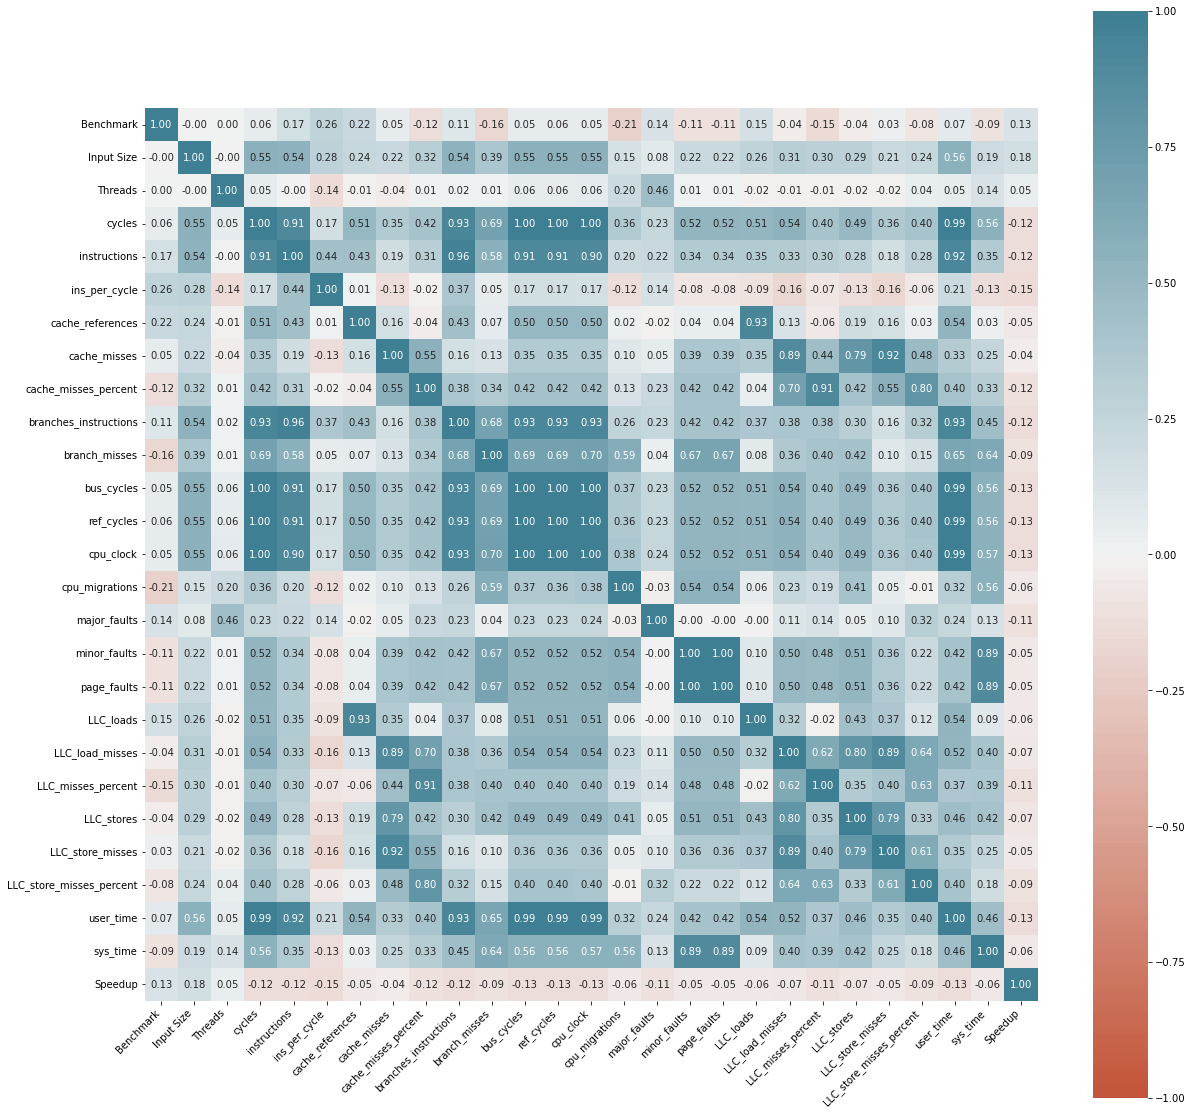

In [22]:
fig, ax = plt.subplots(figsize=(20, 20))

ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,annot=True,fmt=".2f"
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [23]:
unstack_corr = corr.unstack()

In [24]:
unstack_corr

Benchmark  Benchmark                   1.000000e+00
           Input Size                 -8.857386e-17
           Threads                     6.957610e-17
           cycles                      5.775129e-02
           instructions                1.652923e-01
                                           ...     
Speedup    LLC_store_misses           -4.690982e-02
           LLC_store_misses_percent   -9.320259e-02
           user_time                  -1.292348e-01
           sys_time                   -5.766390e-02
           Speedup                     1.000000e+00
Length: 729, dtype: float64

In [25]:
# output = ['Speedup']
# lst = []

# for i in output:
#     print(i+' correlation')
#     corr_table = unstack_corr[abs(unstack_corr)>0.5][i].drop(output, errors='ignore')
#     lst = *lst,*corr_table.index
#     print(corr_table)
#     print('\n')

# print('correlated variables')
# print(set(lst))

In [26]:
# new_data = data[[*set(lst),*output]]

In [27]:
# new_data

In [28]:
# new_data.shape

In [29]:
# temporary code
new_data = data.drop(columns='time',inplace=False)

In [30]:
new_data.to_csv('../data/preprocessed_data.csv',index=False)